In [182]:
from pptx import Presentation

"""
아래의 기본 코드는 잘 됩니다. 
우선 '한글이 되는가', 문제없이 잘됩니다. 
matplotlib와의 연동은 어떤 식으로 해야 하는가? 

(title, text, fig) 의 리스트를 넘겨주면 이를 가지고 슬라이드들을 연속해서 만들어주는 것을 만드려고 합니다. 

(여기서 한글 폰트는 어떻게 바꿔줄 수 있을까? )
"""

prs = Presentation()
title_slide_layout = prs.slide_layouts[0] # what layout? 
slide = prs.slides.add_slide(title_slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]

title.text = "Hello, World!"
subtitle.text = "python-pptx was here!"

prs.save('test.pptx')

In [160]:
from pptx import Presentation
from pptx.util import Inches
"""
ppt file generation ==> save file 로 구성됨.
"""
import matplotlib.pyplot as plt
import numpy as np 
# make simple figure
from io import BytesIO

img_stream_lst = []
for i in range(0, 5):
    f = plt.figure()
    plt.plot(np.random.random(10))
    img_stream = BytesIO()
    plt.savefig(img_stream)
    img_stream_lst.append(img_stream)
    img_stream.close()
print(img_stream_lst)    
    
simple_content_lst = [
    ("한글 제목: {}".format(i), "이건 한글입니다. 잘 될까요? {}".format(i), img_stream_lst[i]) for i in range(0, 5)
]

left = Inches(1)
top = Inches(1)
height = Inches(5.5)


def make_ppt(out_ppt_name, content_lst):
    # Presentation()을 일종의 템플릿 객체
    this_prs = Presentation()
    """
    slide_layout[0]는 title, subtitle로 구성된 제목 슬라이드 
    slide_layout[1]는 title, text로 구성된 일반적인 슬라이드 레이아웃
    """
    slide_layout = this_prs.slide_layouts[1] 
    for title, content, img_stream in content_lst:
        this_slide = this_prs.slides.add_slide(slide_layout)
        shapes = this_slide.shapes
        shapes.title.text = title
        shapes.placeholders[1].text = content
        # placeholders는 개별 slide에 있는 모든 개체를 가져온다고 보면 됨. 
        shapes.add_picture(img_stream, left, top, height=height)
        """
        left = Inches(5)
height = Inches(5.5)
pic = slide.shapes.add_picture(img_path, left, top, height=height)
        """
    this_prs.save(out_ppt_name)
make_ppt("test.pptx", simple_content_lst)




[<_io.BytesIO object at 0x114313a98>, <_io.BytesIO object at 0x112a60938>, <_io.BytesIO object at 0x11338cba0>, <_io.BytesIO object at 0x11aeb7ca8>, <_io.BytesIO object at 0x11ab76f10>]


ValueError: I/O operation on closed file.

In [186]:
# 최종
from pptx import Presentation
from pptx.util import Inches

import matplotlib.pyplot as plt
import numpy as np 

def make_ppt(out_ppt_name, content_lst):
    # Presentation()을 일종의 템플릿 객체
    this_prs = Presentation()
    """
    slide_layout[0]는 title, subtitle로 구성된 제목 슬라이드 
    slide_layout[1]는 title, text로 구성된 일반적인 슬라이드 레이아웃
    """
    slide_layout = this_prs.slide_layouts[1] 
    for title, content, img_file_name in content_lst:
        this_slide = this_prs.slides.add_slide(slide_layout)
        shapes = this_slide.shapes
        shapes.title.text = title
        shapes.placeholders[1].text = content
        # placeholders는 개별 slide에 있는 모든 개체를 가져온다고 보면 됨. 
        #shapes.add_picture(img_stream, left, top, height=height)
        #shapes.add_picture(img_file_name, left=Inches(5), top=Inches(10))
        shapes.add_picture(img_file_name, Inches(2.5), Inches(3.2))
        # 변환하지 않고 숫자로 넘기면 잘 되지 않는다. 
    this_prs.save(out_ppt_name)

def extract_all_text_from_ppt(file_path):
    # read file 
    try: 
        this_prs = Presentation(file_path)
        lst_of_lst = []
        for slide in this_prs.slides:
            each_lst = []
            for p in slide.placeholders:
                if p.has_text_frame: # slide 에 있는 다양한 요소 중에서 text-frame이 있는 경우에 대해서만 고려 
                    each_lst.append(p.text)
            lst_of_lst.append(each_lst)
        return lst_of_lst
    except:
        print("file path is not correct")

img_file_lst = ["text_fig{}.png".format(i) for i in range(0, 5)]
input_content = [("title: {}".format(i), "content: {}".format(i), img_file_lst[i]) for i in range(0, 5)]
make_ppt('new_text.pptx', input_content)

extract_all_text_from_ppt('new_text.pptx')
            

[['title: 0', 'content: 0'],
 ['title: 1', 'content: 1'],
 ['title: 2', 'content: 2'],
 ['title: 3', 'content: 3'],
 ['title: 4', 'content: 4']]

In [183]:
from pptx import Presentation
from pptx.util import Inches

import matplotlib.pyplot as plt
import numpy as np 

img_file_lst = []
for i in range(0, 5):
    f = plt.figure()
    plt.plot(np.random.random(10))
    file_title = "text_fig{}.svg".format(i)
    img_file_lst.append(file_title)
    f.savefig(file_title)

simple_content_lst = [
    ("한글 제목: {}".format(i), "이건 한글입니다. 잘 될까요? {}".format(i), img_file_lst[i]) for i in range(0, 5)
]

def make_ppt(out_ppt_name, content_lst):
    # Presentation()을 일종의 템플릿 객체
    this_prs = Presentation()
    """
    slide_layout[0]는 title, subtitle로 구성된 제목 슬라이드 
    slide_layout[1]는 title, text로 구성된 일반적인 슬라이드 레이아웃
    """
    slide_layout = this_prs.slide_layouts[1] 
    for title, content, img_file_name in content_lst:
        this_slide = this_prs.slides.add_slide(slide_layout)
        shapes = this_slide.shapes
        shapes.title.text = title
        shapes.placeholders[1].text = content
        # placeholders는 개별 slide에 있는 모든 개체를 가져온다고 보면 됨. 
        #shapes.add_picture(img_stream, left, top, height=height)
        #shapes.add_picture(img_file_name, left=Inches(5), top=Inches(10))
        shapes.add_picture(img_file_name, Inches(2.5), Inches(3.2))
        # 그냥 숫자로 넘기면 잘 되지 않는다. 
        """
        left = Inches(5)
height = Inches(5.5)
        """
    this_prs.save(out_ppt_name)
make_ppt("test.pptx", simple_content_lst)
print("complete")


def extract_all_text_from_ppt(file_path):
    # read file 
    try: 
        this_prs = Presentation(file_path)
        lst_of_lst = []
        for slide in this_prs.slides:
            each_lst = []
            for p in slide.placeholders:
                if p.has_text_frame: # slide 에 있는 다양한 요소 중에서 text-frame이 있는 경우에 대해서만 고려 
                    each_lst.append(p.text)
            lst_of_lst.append(each_lst)
        return lst_of_lst
    except:
        print("file path is not correct")

extract_all_text_from_ppt('test.pptx')
            

OSError: cannot identify image file <_io.BytesIO object at 0x11390a468>

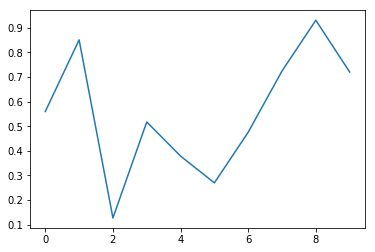

TypeError: print_figure() got multiple values for argument 'dpi'

In [180]:
import matplotlib.pyplot as plt
import numpy as np
plt.close('all') # figure가 너무 많아지면 지워주는 것이 필요함. 

from io import BytesIO, StringIO
byte_stream = BytesIO()
plt.savefig(byte_stream)
img_prs.slides.add_slide(img_prs.slide_layouts[1])

byte_stream.getbuffer()

img_prs = Presentation()
img_slide = img_prs.slides.add_slide(img_prs.slide_layouts[1])

# img_slide.shapes.add_picture('text_fig0.png', Inches(2.5), Inches(3.2)) png로 넘기면 됨. 

img_title = 'aaa.png' #png는 됨 
plt.figure()
plt.plot(np.random.random(10))
plt.savefig(img_title)
img_slide.shapes.add_picture(img_title, Inches(2.5), Inches(3.2))
plt.show()
"""
img_title = 'aaa.svg' #svg 는 안됨 
plt.figure()
plt.plot(np.random.random(10))
plt.savefig(img_title)
img_slide.shapes.add_picture(img_title, Inches(2.5), Inches(3.2))
plt.show()
"""

plt.figure()
plt.plot(np.random.random(10))


"""
img_stream = BytesIO()
plt.savefig(img_stream, format='png', dpi=300)
print(img_stream, type(img_stream))
img_slide.shapes.add_picture(img_stream, Inches(2.5), Inches(3.2)) 그냥 bytestream을 넘기면 안됨 
"""
img_stream = StringIO()
plt.savefig(img_stream, 'png', dpi=300)
print(img_stream.read())
#img_slide.shapes.add_picture(, Inches(2.5), Inches(3.2))




In [189]:
import matplotlib.pyplot as plt
import numpy as np
plt.close('all') # figure가 너무 많아지면 지워주는 것이 필요함. 

from io import BytesIO, StringIO

byte_stream = BytesIO()
plt.savefig(byte_stream)

img_prs = Presentation()
img_slide = img_prs.slides.add_slide(img_prs.slide_layouts[1])
img_slide.shapes.add_picture(byte_stream, Inches(2.5), Inches(3.2))
img_prs.save('test.pptx')

OSError: cannot identify image file <_io.BytesIO object at 0x111d54678>

In [190]:
import matplotlib.pyplot as plt
import numpy as np
plt.close('all') # figure가 너무 많아지면 지워주는 것이 필요함. 

from io import BytesIO, StringIO

byte_stream = StringIO()
plt.savefig(byte_stream)

img_prs = Presentation()
img_slide = img_prs.slides.add_slide(img_prs.slide_layouts[1])
img_slide.shapes.add_picture(byte_stream, Inches(2.5), Inches(3.2))
img_prs.save('test.pptx')

TypeError: string argument expected, got 'bytes'